(ch4:mtx-rep)=
# Matrix Representations Of Networks

When we work with networks, we need a way to represent them mathematically and in our code. A network itself lives in network space, which is just the set of all possible networks. Network space is kind of abstract and inconvenient if we want to use traditional mathematics, so we'd generally like to represent networks with groups of numbers to make everything more concrete.

More specifically, we would often like to represent networks with *matrices*. In addition to being computationally convenient, using matrices to represent networks lets us bring in a surprising amount of tools from linear algebra and statistics. Programmatically, using matrices also lets us use common Python tools for array manipulation like numpy.

A common matrix representation of a network is called the Adjacency Matrix, and we'll learn about that first.

## An Adjacency Matrix

Throughout this book, the beating heart of matrix representations of networks that we will see is the adjacency matrix. The idea is pretty straightforward: Let's say you have a network with $n$ nodes. You give each node an index -- usually some value between 0 and n -- and then you create an $n \times n$ matrix. If there is an edge between node $i$ and node $j$, you fill the $(i, j)_{th}$ value of the matrix with an entry, usually $1$ if your network has unweighted edges. In the case of undirected networks, you end up with a symmetric matrix with full of 1's and 0's, which completely represents the topology of your network.

Let's see this in action. We'll make a network with only three nodes, since that's small and easy to understand, and then we'll show what it looks like as an adjacency matrix.

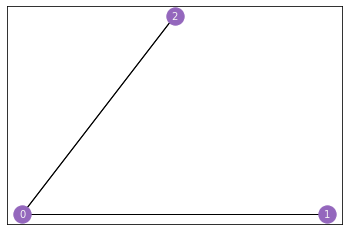

In [1]:
import numpy as np
import networkx as nx

G = nx.DiGraph()
G.add_node("0", pos=(1,1))
G.add_node("1", pos=(4,4))
G.add_node("2", pos=(4,2))
G.add_edge("0", "1")
G.add_edge("1", "0")
G.add_edge("0", "2")
G.add_edge("2", "0")

pos = {'0': (0, 0), '1': (1, 0), '2': (.5, .5)}

nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=False, edge_color="black",
                width=1)
A = np.asarray(nx.to_numpy_matrix(G))

Our network has three nodes, labeled $1$, $2$, and $3$. Each of these three nodes is either connected or not connected to each of the two other nodes. We'll make a square matrix $A$, with 3 rows and 3 columns, so that each node has its own row and column associated to it.

So, let's fill out the matrix. We start with the first row, which corresponds to the first node, and move along the columns. If there is an edge between the first node and the node whose index matches the current column, put a 1 in the current location. If the two nodes aren't connected, add a 0. When you're done with the first row, move on to the second. Keep going until the whole matrix is filled with 0's and 1's. 

The end result looks like the matrix below. Since the second and third nodes aren't connected, there is a $0$ in locations $A_{2, 1}$ and $A_{1, 2}$. There are also zeroes along the diagonals, since nodes don't have edges with themselves.

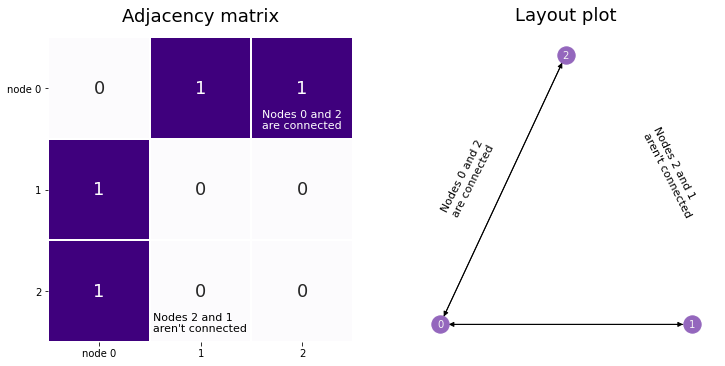

In [2]:
from graphbook_code import heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax1 = heatmap(A, annot=True, linewidths=.1, cbar=False, ax=axs[0], title="Adjacency matrix", 
               xticklabels=True, yticklabels=True);
ax1.tick_params(axis='y', labelrotation=360)

# ticks
yticks = ax1.get_yticklabels()
yticks[0].set_text('node 0')
ax1.set_yticklabels(yticks)

xticks = ax1.get_xticklabels()
xticks[0].set_text('node 0')
ax1.set_xticklabels(xticks)

ax1.annotate("Nodes 0 and 2 \nare connected", (2.1, 0.9), color='white', fontsize=11)
ax1.annotate("Nodes 2 and 1 \naren't connected", (1.03, 2.9), color='black', fontsize=11)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(0, 0.2, s="Nodes 0 and 2 \nare connected", color='black', fontsize=11, rotation=63)
ax2.text(.8, .2, s="Nodes 2 and 1 \naren't connected", color='black', fontsize=11, rotation=-63)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)

Although the adjacency matrix is straightforward and easy to understand, it isn't the only way to represent networks.

## The Degree Matrix

The degree matrix isn't a full representation of our network, because you wouldn't be able to reconstruct an entire network from a degree matrix. However, it's fairly straightforward and it pops up relatively often as a step in creating other matrices, so the degree matrix is useful to mention. It's just a diagonal matrix with the values along the diagonal corresponding to the number of each edges each node has, also known as the degree of each node. You'll learn more about the degree matrix when we discuss [Properties of Networks](#link?) in a few sections.

You can see the degree matrix for our network below. The diagonal element corresponding to node zero has the value of two, since it has two edges; and the rest of the nodes have a value of one, since they each are only connected to the first node.

In [3]:
# Build the degree matrix D
degrees = np.count_nonzero(A, axis=0)
D = np.diag(degrees)

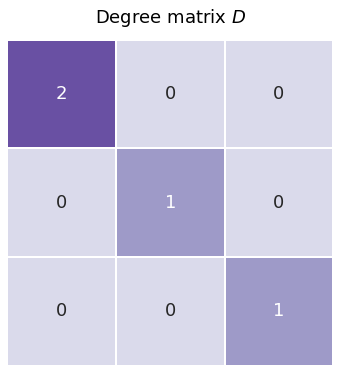

In [4]:
fig, ax = plt.subplots(figsize=(6,6))

D_ax = heatmap(D, annot=True, linewidths=.1, cbar=False, title="Degree matrix $D$", 
               ax=ax);

## The Laplacian Matrix

The standard, cookie-cutter Laplacian Matrix $L$ is just the adjacency matrix $A$ subtracted from the the degree matrix $D$. 

$L = D - A$

Since the only nonzero values of the degree matrix is along its diagonals, and because the diagonals of an adjacency matrix never contain zeroes if its network doesn't have nodes connected to themselves, the diagonals of the Laplacian are just the degree of each node. The values on the non-diagonals work similarly to the adjacency matrix: they contain a $-1$ if there is an edge between the two nodes, and a $0$ if there is no edge.

The figure below shows you what the Laplacian looks like. Since each node has exactly two edges, the degree matrix is just a diagonal matrix of all twos. The Laplacian looks like the degree matrix, but with -1's in all the locations where an edge exists between nodes $i$ and $j$.

In [5]:
L = D - A

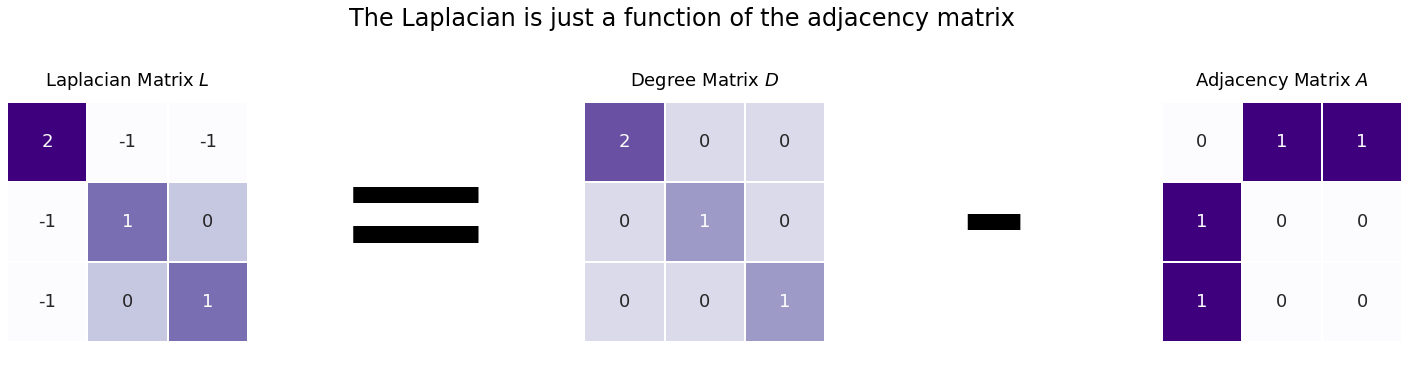

In [6]:
from graphbook_code import heatmap
import seaborn as sns
from matplotlib.colors import Normalize
from graphbook_code import GraphColormap
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# First axis (Laplacian)
L_ax = heatmap(L, ax=axs[0], cbar=False, title="Laplacian Matrix $L$", annot=True, 
        linewidths=.1)

# Second axis (-)
axs[1].text(x=.5, y=.5, s="=", fontsize=200, 
            va='center', ha='center')
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
sns.despine(ax=axs[1], left=True, bottom=True)

# Third axis (Degree matrix)

heatmap(D, ax=axs[2], cbar=False, title="Degree Matrix $D$", annot=True, 
        linewidths=.1)

# Third axis (=)
axs[3].text(x=.5, y=.5, s="-", fontsize=200,
            va='center', ha='center')
axs[3].get_xaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)
sns.despine(ax=axs[3], left=True, bottom=True)

# Fourth axis (Laplacian)
heatmap(A, ax=axs[4], cbar=False, title="Adjacency Matrix $A$", annot=True, 
        linewidths=.1)

fig.suptitle("The Laplacian is just a function of the adjacency matrix", fontsize=24, y=1.1);

We use the Laplacian in practice because it has a number of interesting mathematical properties, which tend to be useful for analysis. For instance, the magnitude of its second-smallest eigenvalue, called the Fiedler eigenvalue, tells you how well-connected your network is -- and the number of eigenvalues equal to zero is the number of connected components your network has (a connected component is a group of nodes in a network which all have a path to get to each other -- think of it as an island of nodes and edges). Incidentally, this means that the smallest eigenvalue of the Laplacian will always be 0, since any network always has at least one "island".

Another interesting property of the Laplacian is that the sum of its diagonals is twice the number of edges in the network. Because the sum of the diagonal matrix is the trace, and the trace is also equal to the sum of the eigenvalues, this means that the sum of the eigenvalues of the Laplacian is equal to twice the number of edges in the network.

Laplacians and adjacency matrices will be used throughout this book, and details about when and where one or the other will be used are in the spectral embedding chapter.

### The Normalized Laplacian

There are a few variations on the standard $D-A$ version of the Laplacian which are widely used in practice, and which (confusingly) are often also called the Laplacian. They tend to have similar properties. The Normalized Laplacian, $L^{normalized}$ is one such variation. The Normalized Laplacian is defined as

$L^{normalized} = D^{-1/2} L D^{-1/2} = I - D^{-1/2} A D^{-1/2}$

Where $I$ is the identity matrix (the square matrix with all zeroes except for ones along the diagonal). You can work through the algebra yourself if you'd like to verify that the second expression is the same as the third.

Below you can see the normalized Laplacian in code. We use `graspologic`'s `to_laplacian` function, with the `form` set to `I - DAD`, which computes $L^{normalized}$ above.

In [7]:
from graspologic.utils import to_laplacian
L_sym = to_laplacian(A, form="I-DAD")

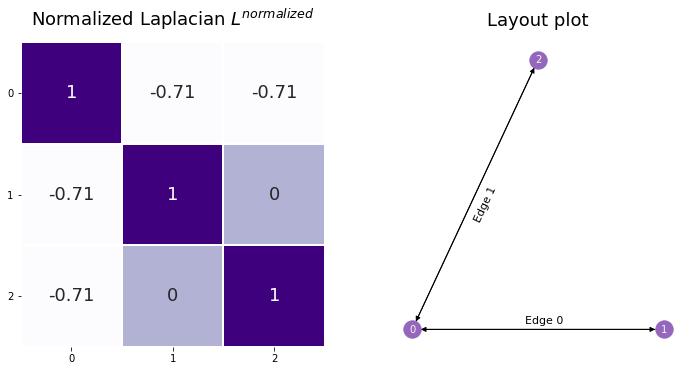

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

L_sym_ax = heatmap(L_sym, annot=True, linewidths=.1, cbar=False, title="Normalized Laplacian $L^{normalized}$", 
               xticklabels=True, yticklabels=True, ax=axs[0]);

L_sym_ax.tick_params(axis='y', labelrotation=360)


ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(.24, 0.2, s="Edge 1", color='black', fontsize=11, rotation=65)
ax2.text(.45, 0.01, s="Edge 0", color='black', fontsize=11)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)

You can understand the normalized Laplacian from the name: you can think of it as the Laplacian normalized by the degrees of the incident nodes for each entry.

You can see this by looking at what the operation is doing:

\begin{align*}
    L^{normalized} &= D^{-\frac{1}{2}}L D^{-\frac{1}{2}} \\
    &= \begin{bmatrix}
        d_{1} & & \\
        & \ddots & \\
        & & d_n
    \end{bmatrix}^{-\frac{1}{2}}\begin{bmatrix}
        l_{11} & ... & l_{1n} \\
        \vdots & \ddots & \vdots \\
        l_{n1} & ... & l_{nn}
    \end{bmatrix}
    \begin{bmatrix}
        d_{1} & & \\
        & \ddots & \\
        & & d_n
    \end{bmatrix}^{-\frac{1}{2}} \\
    &= 
    \begin{bmatrix}
        \frac{1}{\sqrt{d_1}} & & \\
        & \ddots & \\
        & & \frac{1}{\sqrt{d_n}}
    \end{bmatrix}\begin{bmatrix}
        l_{11} & ... & l_{1n} \\
        \vdots & \ddots & \vdots \\
        l_{n1} & ... & l_{nn}
    \end{bmatrix}
    \begin{bmatrix}
        \frac{1}{\sqrt{d_1}} & & \\
        & \ddots & \\
        & & \frac{1}{\sqrt{d_n}}
    \end{bmatrix} \\
    &= \begin{bmatrix}
        \frac{l_{11}}{d_1} & ... & \frac{l_{1n}}{\sqrt{d_1}\sqrt{d_n}} \\
        \vdots & \ddots & \vdots \\
        \frac{l_{n1}}{\sqrt{d_n}\sqrt{d_1}} & ... & \frac{l_{nn}}{d_n}
    \end{bmatrix}
\end{align*}
So the normalized laplacian has entries $l^{normalized}_{ij} = \frac{l_{ij}}{\sqrt{d_i}\sqrt{d_j}}$.

We can plug in the value of $L$ to obtain a similar relationship with the adjacency matrix $A$. Notice that:
\begin{align*}
    L^{normalized} &=  D^{-\frac{1}{2}}L D^{-\frac{1}{2}} \\
    &=  D^{-\frac{1}{2}}(D - A) D^{-\frac{1}{2}} \\
    &= D^{-\frac{1}{2}}DD^{-\frac{1}{2}} - D^{-\frac{1}{2}}A D^{-\frac{1}{2}} \\
    &= D^{\frac{1}{2}}D^{-\frac{1}{2}} - D^{-\frac{1}{2}}A D^{-\frac{1}{2}} \\
    &= I_{n \times n} - D^{-\frac{1}{2}}A D^{-\frac{1}{2}}
\end{align*}

The $D^{-1/2} D D^{-1/2}$ term is spiritually the same as what you'd think of $\frac{D}{D}$ (if that was defined!), since it just works out to be the identity matrix. The $D^{-1/2} A D^{-1/2}$ is just doing the same thing to $A$ that you did to $L$. So you're normalizing the entries of the adjacency matrix by the degrees of the incident nodes; that is, $\frac{a_{ij}}{\sqrt{d_i}\sqrt{d_j}}$.

One useful property of the normalized Laplacian is that its eigenvalues are bounded between 0 and 2. This normalization tends to be useful, because the Laplacian is a thing called a *positive semi-definite matrix*. This means that a suite of linear algebra techniques, which may *not* run successfully on the adjacency matrix (which is *not* positive semi-definite in its most raw form for *simple networks*, which you will learn about in the next chapter), can be executed on the network Laplacian.